# 最尤推定と線形モデル



## Pytorchで線形モデル（From Scratch）

以下の線形モデルのパラメータを求めてみましょう。

$y= 1 + 2x_1 + 3x_2$

In [3]:
import torch
from matplotlib import pyplot as plt
plt.style.use('ggplot')


In [ ]:
import torch

w_true = torch.Tensor([1, 2, 3])

X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
y = torch.mv(X, w_true) + torch.randn(100) * 0.5

w = torch.randn(3, requires_grad=True)

gamma = 0.1

In [4]:
losses = []

for epoc in range(100):
  w.grad = None
  y_pred = torch.mv(X, w)
  loss = torch.mean((y - y_pred) ** 2)
  loss.backward()
  w.data = w.data - gamma * w.grad.data
  losses.append(loss.item())

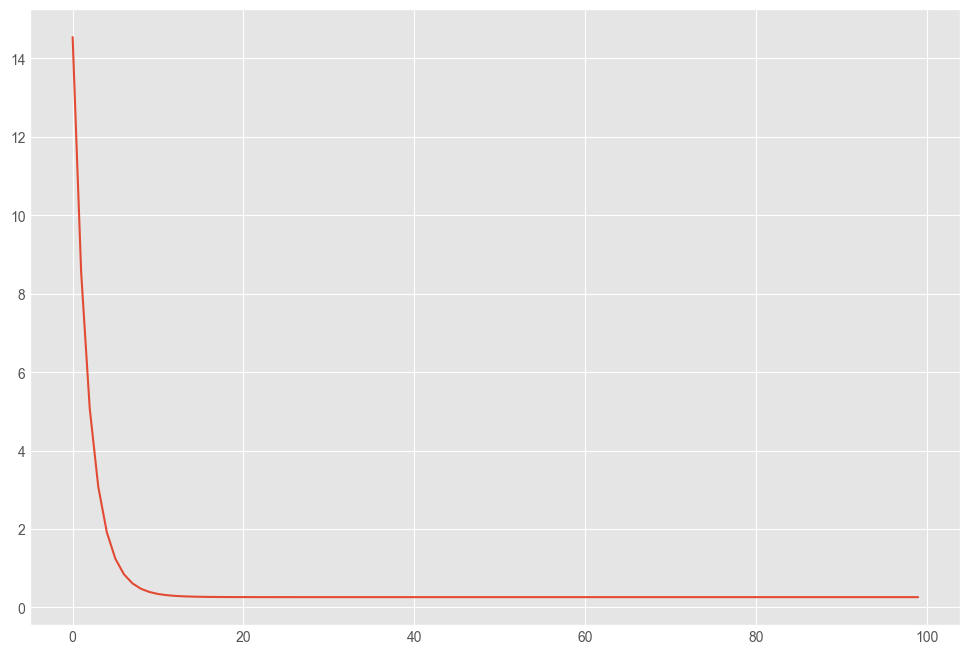

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(losses)
plt.show()

In [7]:
w

tensor([1.0048, 2.0171, 3.0166], requires_grad=True)

## Pytorchで線形モデル（nn, optimモジュールの使用）

先程では自動微分を使う以外はモデルの構築や勾配効果の計算をすべて自分で行っていましたが、これらはPytorchでシンプルに書くためのモジュールが用意されています。

モデルの構築は `torch.nn`
最適化は `torch.optim` 
に含まれています。

In [8]:
from torch import nn, optim

In [9]:
net = nn.Linear(in_features=3, out_features=1, bias=False)

optimizer = optim.SGD(net.parameters(), lr=0.1)

loss_fn = nn.MSELoss()

In [10]:
losses = []

for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

In [11]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0048, 2.0171, 3.0166]], requires_grad=True)]

## Pytorchでロジスティクス回帰

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [14]:
X = iris.data[:100]
y = iris.target[:100]

In [15]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [21]:
X[:4]

tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000]])

In [23]:
net = nn.Linear(4, 1, bias=False)
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.25)

In [24]:
losses = []
for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

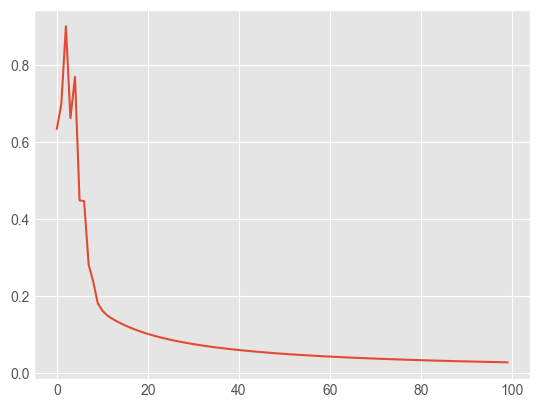

In [25]:
plt.plot(losses)
plt.show()

In [26]:
h = net(X)

prob = nn.functional.sigmoid(h)

y_pred = prob > 0.5

(y.byte() == y_pred.view_as(y)).sum().item() 

/Users/fukushimatakahiro/.local/share/virtualenvs/pytorch_intro-VXqf8wZJ/lib/python3.9/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


100

## 多クラスのロジスティクス回帰

ロジスティクス回帰は２クラスだけでなく、多クラスの分類問題にも拡張できます。

先程の線形結合層の出力を１次元ではなく、分類するクラス数の次元にし、損失関数をソフトマックスクロスエントロピーというクロスエントロピー関数の多クラス版に置き換える形で実装していきます。


In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

In [28]:
X = digits.data
y = digits.target


In [29]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

In [30]:
net = nn.Linear(X.size()[1], 10, bias=False)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [31]:
losses = []
for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred, y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

In [32]:
_, y_pred = torch.max(net(X), 1)
(y == y_pred).sum().item() / len(y)

0.9543683917640512